In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print('Path of wine quality dataset :' + file_path)
        
wine_data_raw = pd.read_csv(file_path)
wine_data_raw.head(5)

Path of wine quality dataset :/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# General structure of wine quality
wine_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# Statistical Values Check
wine_data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
# Check the missing values in dataset
for col in wine_data_raw.columns:
    print(col, ' has ', len(wine_data_raw[wine_data_raw[col].isna() == True]), ' missing values in dataset')
    
'''
you can show this result with list comparison method also.

[print(col, ' has ', len(wine_data_raw[wine_data_raw[col].isna() == True]), ' missing values in dataset') for col in wine_data_raw.columns]

'''

fixed acidity  has  0  missing values in dataset
volatile acidity  has  0  missing values in dataset
citric acid  has  0  missing values in dataset
residual sugar  has  0  missing values in dataset
chlorides  has  0  missing values in dataset
free sulfur dioxide  has  0  missing values in dataset
total sulfur dioxide  has  0  missing values in dataset
density  has  0  missing values in dataset
pH  has  0  missing values in dataset
sulphates  has  0  missing values in dataset
alcohol  has  0  missing values in dataset
quality  has  0  missing values in dataset


"\nyou can show this result with list comparison method also.\n\n[print(col, ' has ', len(wine_data_raw[wine_data_raw[col].isna() == True]), ' missing values in dataset') for col in wine_data_raw.columns]\n\n"

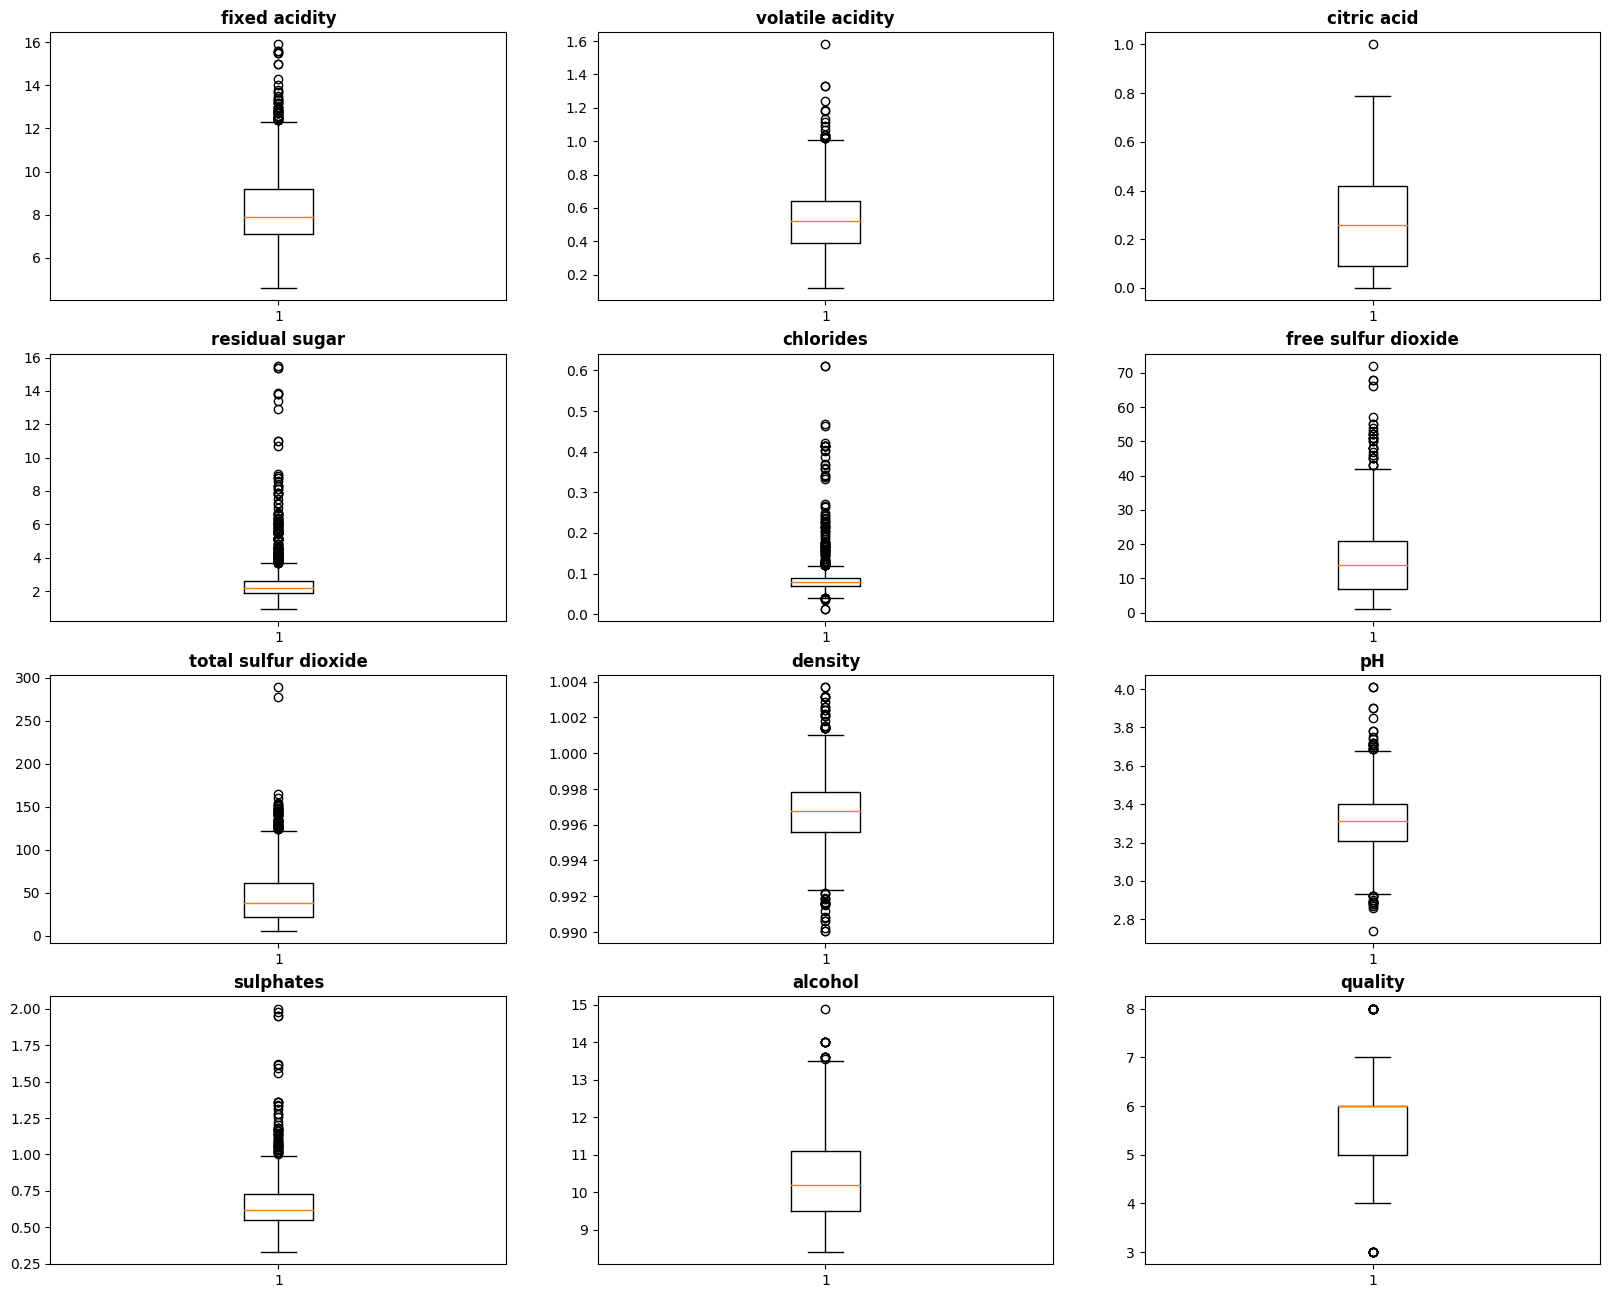

In [5]:
fig, axs = plt.subplots(nrows=4, ncols = 3)
fig.set_size_inches(20, 16)
axs = axs.ravel()
sub_plot = 0
for col in wine_data_raw.columns:
    
    axs[sub_plot].boxplot(wine_data_raw[col])
    
    # AAdd title for each subplot
    axs[sub_plot].set_title(col, fontsize=12, fontweight = 'bold')
    sub_plot += 1

Text(0.5, 1.0, 'Correlation Matrix')

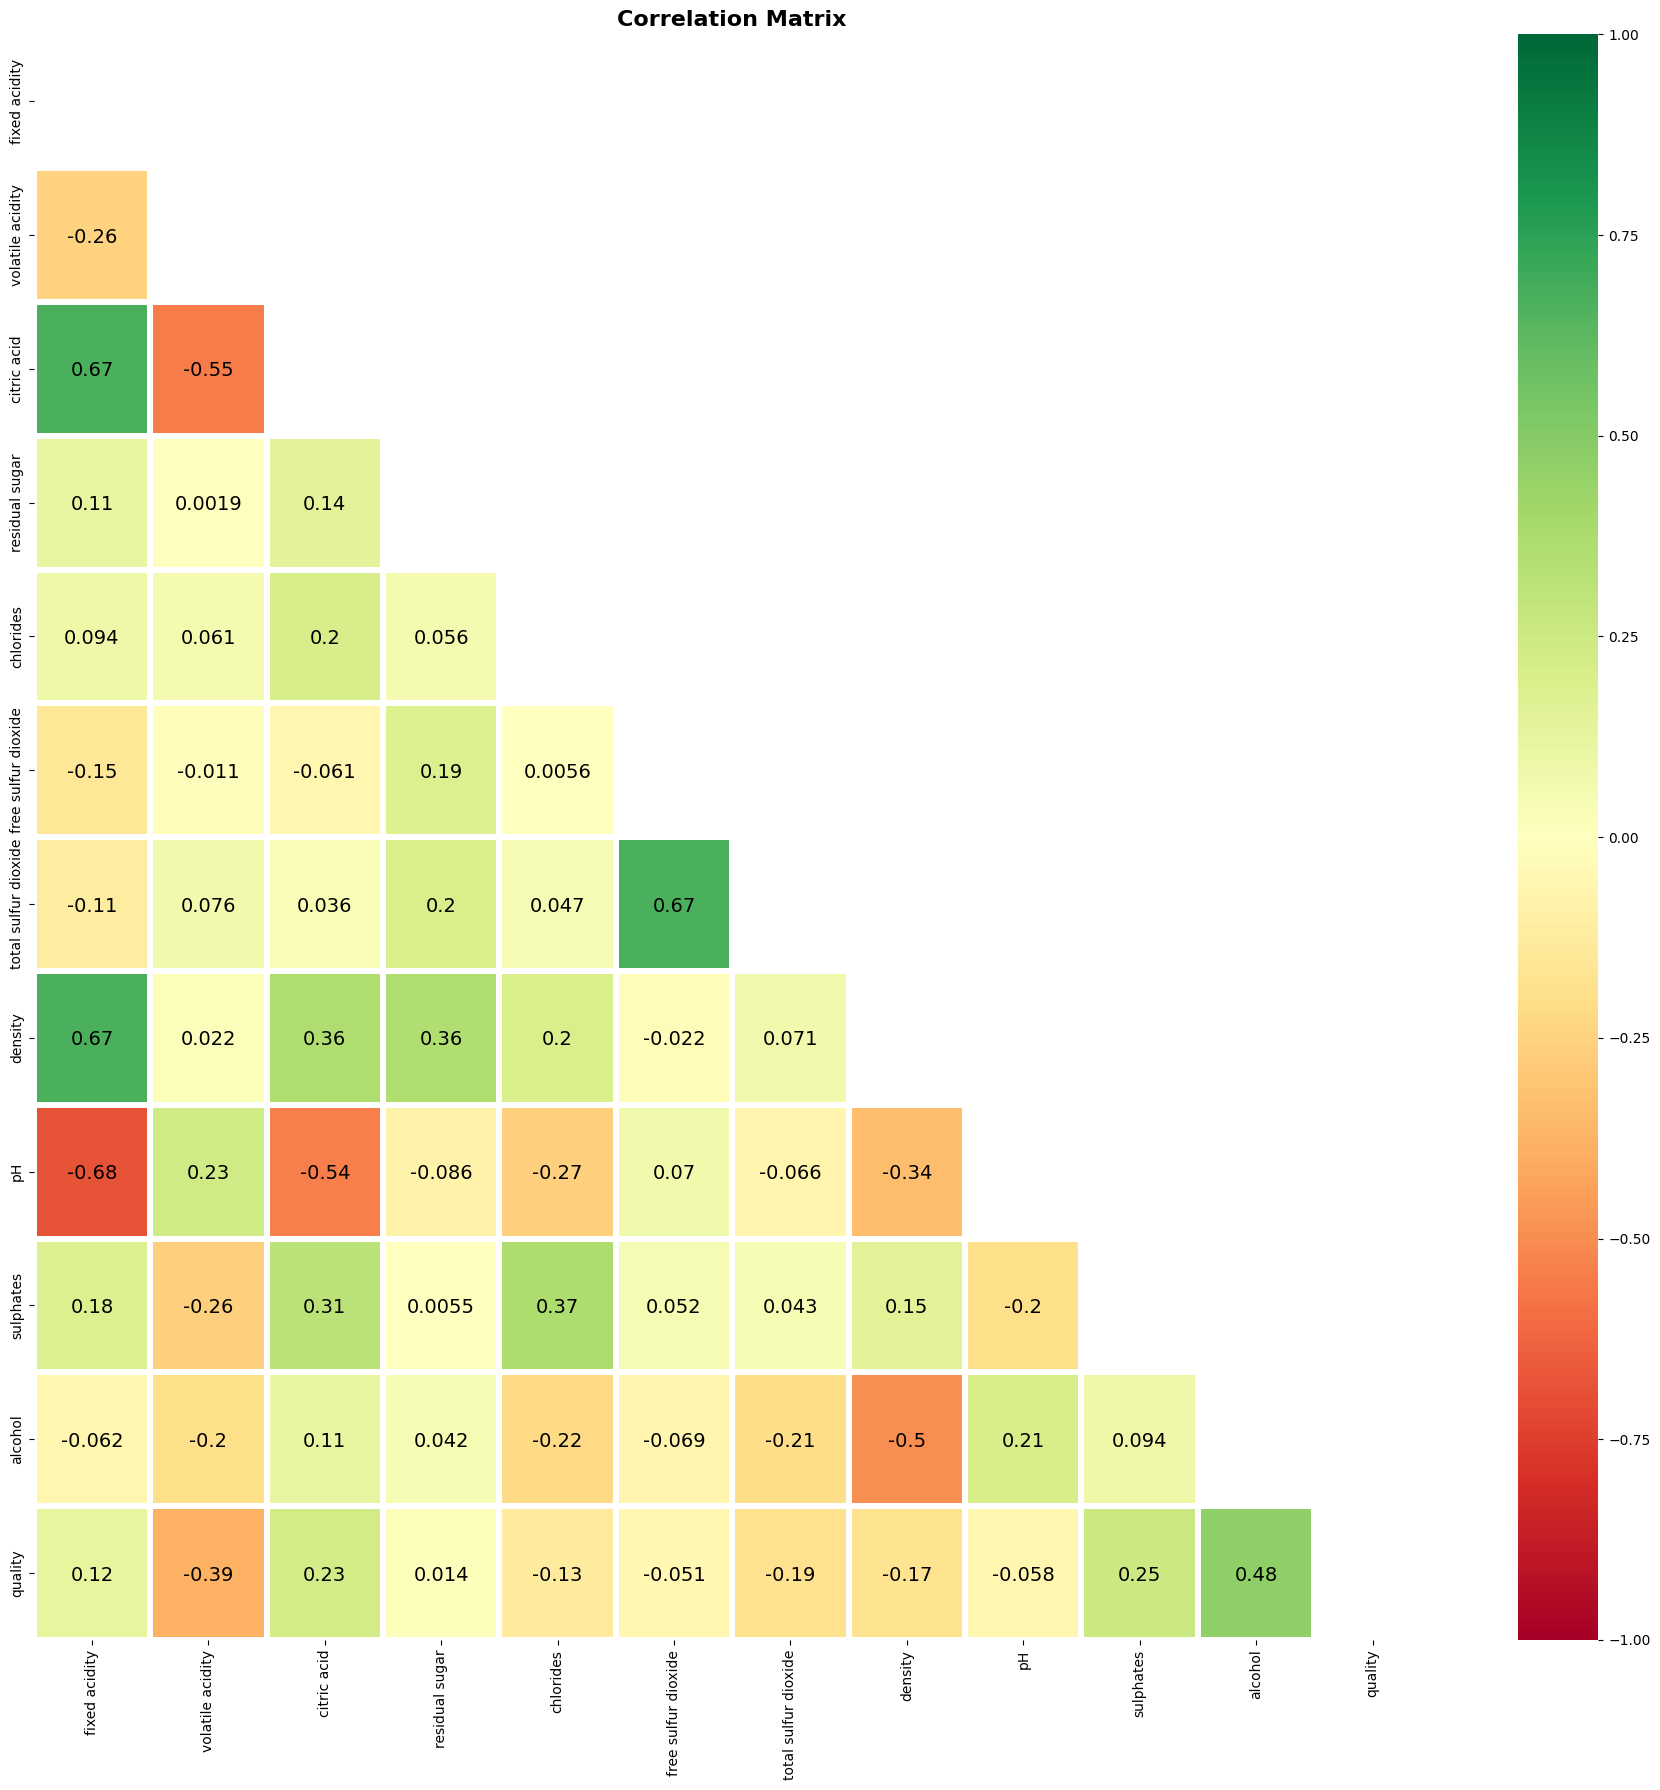

In [6]:
'''

With values close to -1, there is a strong inverse ratio between the two variables.
With values close to 1,  there is a strong direct ratio between the two variables.
With values close to 0,  there is no correlation.

'''

plt.rcParams["figure.figsize"] = [18, 18]
plt.rcParams["figure.autolayout"] = True

corr= wine_data_raw.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,cmap="RdYlGn", annot = True, annot_kws={"size": 14, "va": "center_baseline", "color": "black"},mask = mask,linewidth=3, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontweight = 'bold', fontsize = 16)

# There is no multicollinearity in dataset.

In [7]:
def sns_count_graph(df, parameter_x):    
    plt.rcParams["figure.figsize"] = [4, 4]
    graph = sns.countplot(data= df, x= parameter_x)
    graph.axes.set_title("Distribution of " +  str(parameter_x) ,fontsize=11, fontweight = 'bold')    
    graph.set_xlabel(str(parameter_x),fontsize=9,fontweight = 'bold')
    graph.set_ylabel("Sample Sizes",fontsize=9, fontweight = 'bold')
    graph.set_xticklabels(graph.get_xticklabels(), fontsize=8)
    plt.tight_layout()
    plt.show()

In [8]:
print('Quality Classes: ', sorted(wine_data_raw.quality.unique()))

def quality_class(x):
    if x < 5:
        return 'poor_quality'
    elif x<7:
        return 'regular_quality'
    else:
        return 'high_quality'
    
wine_data_raw['quality_class'] = wine_data_raw.quality.apply(quality_class)
print('New Quality Classes: ', sorted(wine_data_raw.quality_class.unique()))

Quality Classes:  [3, 4, 5, 6, 7, 8]
New Quality Classes:  ['high_quality', 'poor_quality', 'regular_quality']


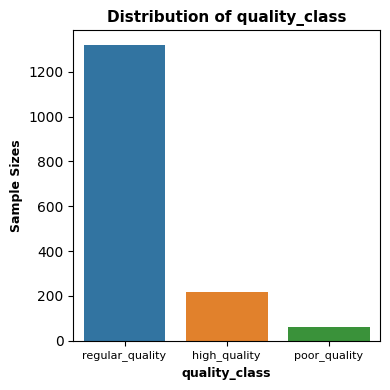

In [9]:
sns_count_graph(wine_data_raw, 'quality_class')
# According to plot, our dataset is imbalance ! and this is a multiclass classification problem.
# Accuracy score might be biased.

In [10]:
# Decision Tree 
X = wine_data_raw.iloc[:, :-2].values # Model Inputs

from sklearn.preprocessing import LabelEncoder
# Labeled data musy be converted integer value
le = LabelEncoder()
y = le.fit_transform(wine_data_raw['quality_class']) # Model Output

# high_quality : 0
# poor_quality : 1
# regular_quality : 2

# Splitting dataset as a train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

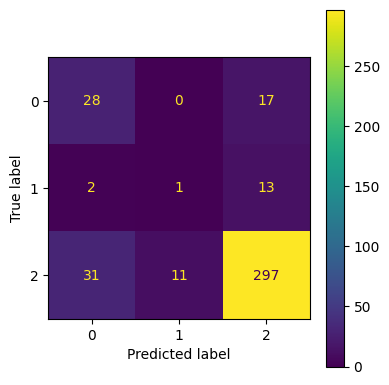

Accuracy:  0.815
F1-Score :  0.8181694834996723
Recall:  0.815


In [11]:
# Model Results
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot()
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred)) 
print('F1-Score : ', f1_score(y_test, y_pred, average = 'weighted')) 
print('Recall: ', recall_score(y_test, y_pred ,average = 'micro')) 